 # __Car Sales For Specific EngType__

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Of all the cars, how many cars has registration?](#section401)<br/>
    - 4.2 [Which EngType car has more drive option?](#section402)<br/>
    - 4.3 [Which build year cars are more?](#section403)<br/>
    - 4.4 [Which body engType are more?](#section404)<br/>
    - 4.5 [Which body cars are more?](#section405)<br/>
    - 4.6 [Comparison between mileage and price for all cars](#section406)<br/>
    - 4.7 [Draw a pair plot to know the joint relationship between 'Price','Mileage'and 'Body'](#section407)<br/>
    - 4.8 [Establish correlation between all the features using heatmap](#section408)<br/>
    - 4.9 [Hypothesis: Petrol Cars are more likely to be sold](#section409)<br/>
5. [Conclusions](#section5)<br/>  

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA is a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

### 2. Data Loading and Description

- The dataset consists of the information about different type of cars where various variables present in dataset includes price, body, mileage, type of engine, registration, build year, model and drive of car.
- The dataset comprises of __9576 observations of 10 columns__. Below is a table showing names of all the columns and description.

| __Column Name__   |    __Description__                           |
| -------------     |   :-------------                            :| 
| Car               |    Car brand name                            | 
| Price             |    Price of car                              |  
| Body              |    Body of car                               | 
| Mileage           |    Mileage of car                            |   
| EngV              |    Engine version of car                     |
| EngType           |    Engine type of car                        |
| Registration      |    Registration of car                       |
| Year              |    Build year of car                         |
| Model             |    Model of car                              |
| Drive             |    Drive of car                              |

#### Importing packages    

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output


#### Importing the Dataset

In [2]:
car_data=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', engine ='python') # Importing dataset using pd.read_csv        

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.



### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [3]:
car_data.shape                                               # This will print the number of rows and comlumns of the Data Frame

(9576, 10)

Car_data has __9576 rows__ and __10 columns__

In [4]:
car_data.columns                                            # This will print the names of all columns.

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [5]:
car_data.head()                                             # This will print the first 5 rows of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [6]:
car_data.tail()                                             # This will print the last 5 rows of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [7]:
car_data.info()                                             # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [8]:
car_data.describe(include = 'all')                          # This will give descriptive statistics for the numerical variables

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [9]:
car_data.describe()                                         # This will give descriptive statistics for the numerical variables excluding NaN

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [10]:
car_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From the above output we can see that __engV__ and __drive__ columns contains __maximum null values__. We will see how to deal with them.

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [11]:
profile = pandas_profiling.ProfileReport(car_data)
profile.to_file(outputfile="car_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __car_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing

- Dealing with missing values and zero values<br/>
    - Replacing missing values of __engV__ with mean values.
    - Replacing missing values of __drive__ with front as it has maximum count.
    - Replacing 0 values of price with median values.
    - Replacing 0 values of mileage with mean values.

In [12]:
mean_engV = car_data.engV.mean()
car_data.engV.fillna(mean_engV, inplace = True)

In [17]:
car_data['drive']=car_data['drive'].replace(np.nan,'front')

In [14]:
car_data['price']=car_data['price'].replace(0,car_data['price'].median())

In [15]:
car_data['mileage']=car_data['mileage'].replace(0,car_data['mileage'].mean())

## 3.4 Post Pandas Profiling

In [18]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(car_data)
profile.to_file(outputfile="car_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values amd zero values. So,the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. We can compare the two reports, i.e __car_before_preprocessing.html__ and __car_after_preprocessing.html__.<br/>
In __car_after_preprocessing.html__ report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__
- In the Dataset , we have replaced zero values for __price__ and __mileage__
- Number of __variables__ = __10__







### 4. Questions






### 4.1 Of all the cars, how many cars has registration?


Text(0.5,1,'Cars having Registration')

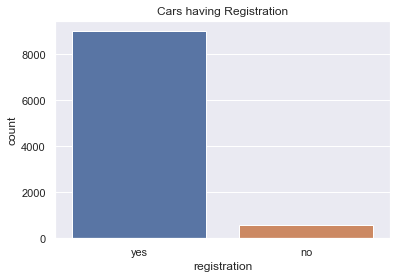

In [73]:
sns.countplot(x='registration', data=car_data).set_title('Cars having Registration')

We can see that __there are more cars with registration.__

In [6]:
car_data.groupby(['registration'])['registration'].count()

registration
no      561
yes    9015
Name: registration, dtype: int64

__9015__ cars __has registration__ and only __561__ cars __has no registraion.__

### 4.2 Which EngType car has more drive option?

C:\Users\Neel\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'EngType that having more drive option')

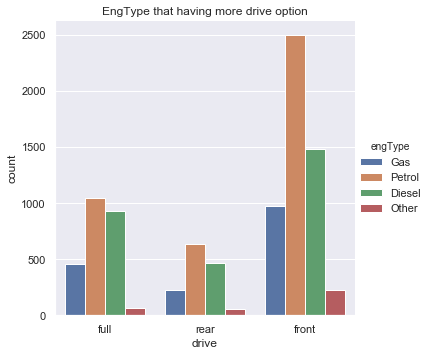

In [58]:
sns.factorplot('drive', hue='engType', kind='count', data=car_data)
plt.title('EngType that having more drive option')

- Majority of drive is __Petrol.__
- Front drive has maximum count of engType __Petrol.__
- Buyer has more chances to buy a __Petrol car__ in __front drive__ than any other engType.

In [39]:
car_data.groupby(['drive','engType'])['engType'].count()

drive  engType
front  Diesel     1485
       Gas         975
       Other       228
       Petrol     2500
full   Diesel      932
       Gas         460
       Other        64
       Petrol     1044
rear   Diesel      464
       Gas         221
       Other        55
       Petrol      637
Name: engType, dtype: int64

### 4.3 Which build year cars are more?

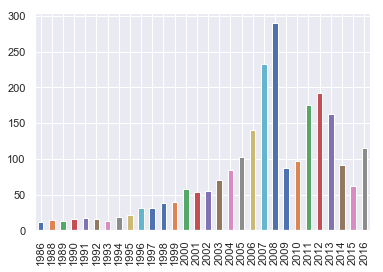

In [67]:
(car_data['year'].value_counts().head(30)/len('year')).sort_index().plot.bar()

- From the above graph we can clearly see that more cars are with build year __2007__ and __2008.__

### 4.4 Which body engType are more?

C:\Users\Neel\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'EngType more for body')

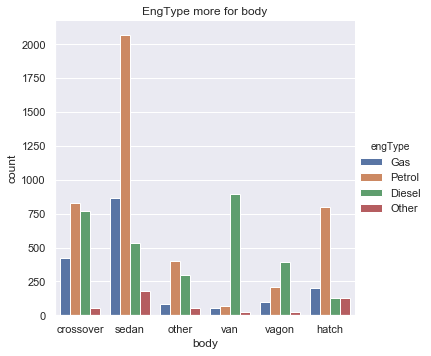

In [59]:
sns.factorplot('body', hue='engType', kind='count', data=car_data)
plt.title('EngType more for body')

In [57]:
car_data.groupby(['body','engType'])['engType'].count()

body       engType
crossover  Diesel      766
           Gas         421
           Other        52
           Petrol      830
hatch      Diesel      129
           Gas         200
           Other       124
           Petrol      799
other      Diesel      296
           Gas          84
           Other        55
           Petrol      403
sedan      Diesel      535
           Gas         865
           Other       177
           Petrol     2069
vagon      Diesel      390
           Gas          96
           Other        27
           Petrol      209
van        Diesel      897
           Gas          56
           Other        27
           Petrol       69
Name: engType, dtype: int64

### 4.5 Which body cars are more?

Text(0.5,1,'Cars body count')

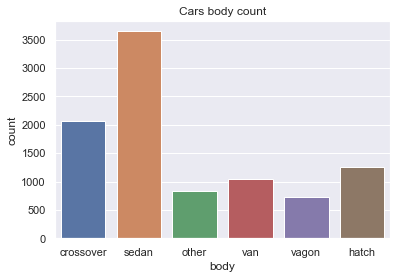

In [3]:
sns.countplot ( x= 'body' , data = car_data).set_title('Cars body count')

- From the above plot we can clearly see that __sedan__ body has more cars count

In [17]:
car_data.groupby(['body'])['body'].count()

body
crossover    2069
hatch        1252
other         838
sedan        3646
vagon         722
van          1049
Name: body, dtype: int64

There are total __3646 sedan__ cars which is higher compare to other body types

### 4.6 Comparison between mileage and price for all cars

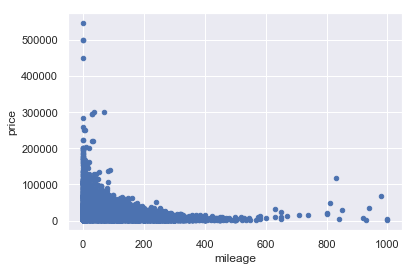

In [13]:
car_data[car_data['price'] > 0].plot.scatter(x='mileage', y='price')

- From the above graph we can depict that as __mileage increase__ for the cars __price also increase__
- There are very few cars for which price is high in comparison to mileage

### 4.7 Draw a pair plot to know the joint relationship between 'Price','Mileage'and 'Body'

C:\Users\Neel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Neel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


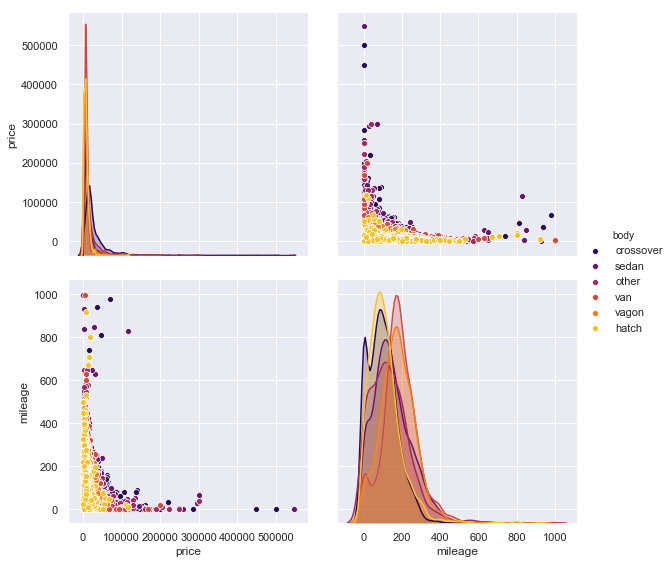

In [53]:
sns.pairplot(car_data[['price','mileage','body']],hue ='body',palette="inferno",size=4)

- Car with __van__ body has more mileage(Van peak is gradually high than other peak)
- Car with __hatch__ body are less in price compare to others
- Car with __sedan__ body has highest price

### 4.8 Establish correlation between all the features using heatmap

Text(0.5,1,'Correlation between features')

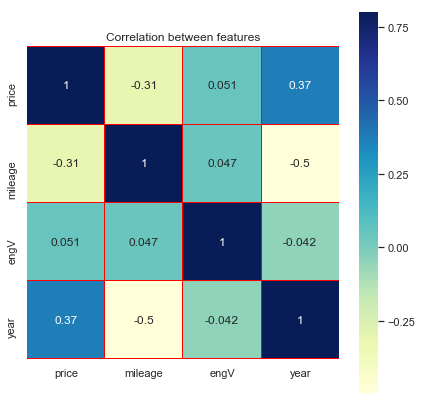

In [44]:
corr = car_data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='red')
plt.title('Correlation between features')

- __Mileage__ and __Price__ are positively correlated with engV
- __Year__ and __Price__ are negatively correlated with mileage
- __Mileage__ and __engV__ are negatively correlated with year
- With high correlation we face __redundancy__ issues

### 4.9 Hypothesis: Petrol Cars are more likely to be sold

On studying above Questionaire, we observed that __petrol car__ are more likely to be sold.

- Out of all drive, front drive is more where engType petrol are more.
- Out of all body type sedan count is more and also for most of them engType is Petrol
- Also petrol cars in hatch body are less price hence it is more likely to be get sold
- Price are low in compare to less mileage for petrol cars

Since petrol cars count are more across all body types hence there are more chance for a buyer to buy petrol cars for any body types.

## 5. Conclusion

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __pre-processing__ helps in dealing with _missing_ values and irregularities present in the data.
- We also make use of __pandas profiling__ feature to generate html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Body,Mileage,engType,engV,drive and year_ on car price.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which car price is highly positively and negatively correlated with.__
- This analysis will help us to choose which __machine learning model__ we can apply to predict engType of car more likely to be sold. 